# A gaussian integral

Using Monte Carlo integration, check that  
<center> $\int_{0}^{\infty} x^3 exp( -\frac{x^2}{2\sigma^2} ) dx = 2\sigma^4$ </center>

In [65]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import halfnorm
from scipy.optimize import curve_fit

Does the result converge with the number of samples?

The numerical value of the integral is 1240.6596006876473
The given result of the integral is 1250


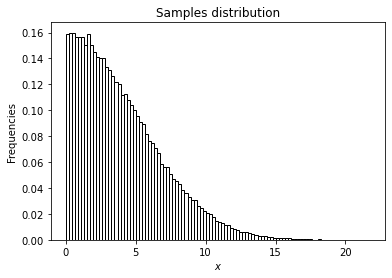

In [70]:
mu = 0
sigma = 5
N = 100000

xi = halfnorm.rvs(loc=0, scale=sigma, size=N)

def fun(x):
    return x**3 

I = np.sqrt(np.pi / 2) * sigma * np.mean(fun(xi))  #normalized half-gaussian

print("The numerical value of the integral is", I)
print("The given result of the integral is", 2*sigma**4)

plt.hist(xi, density = True, bins=100, color='white', edgecolor='black')
plt.title("Samples distribution")
plt.xlabel("$x$")
plt.ylabel("Frequencies")
plt.show()

In [67]:
def integral(N, sigma):
    numeri_casuali = halfnorm.rvs(loc=0, scale=sigma, size=N)
    return np.sqrt(np.pi / 2) * sigma * np.mean(fun(numeri_casuali))

def truevalue(sigma):
    return 2*sigma**4

In [68]:
N_values = np.unique(np.logspace(0, 6, 100, dtype=int))
N_values

array([      1,       2,       3,       4,       5,       6,       7,
             8,       9,      10,      12,      14,      16,      18,
            21,      24,      28,      32,      37,      43,      49,
            57,      65,      75,      86,     100,     114,     132,
           151,     174,     200,     231,     265,     305,     351,
           403,     464,     533,     613,     705,     811,     932,
          1072,    1232,    1417,    1629,    1873,    2154,    2477,
          2848,    3274,    3764,    4328,    4977,    5722,    6579,
          7564,    8697,   10000,   11497,   13219,   15199,   17475,
         20092,   23101,   26560,   30538,   35111,   40370,   46415,
         53366,   61359,   70548,   81113,   93260,  107226,  123284,
        141747,  162975,  187381,  215443,  247707,  284803,  327454,
        376493,  432876,  497702,  572236,  657933,  756463,  869749,
       1000000])

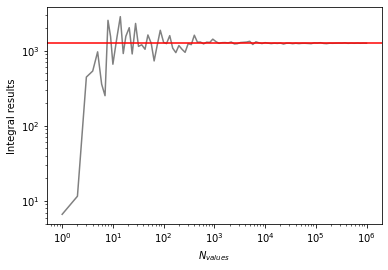

In [69]:
results = []

results = np.array([integral(N, sigma) for N in N_values])

'''for N in valori_N:
    
    numeri_casuali = halfnorm.rvs(loc=0, scale=sigma, size=N)
    integral = np.sqrt(np.pi / 2) * sigma * np.mean(fun(numeri_casuali))
    #error = abs(integral - 2*sigma**4)
    
    results.append(integral)
    #errors.append(error)'''
    
#plt.plot(np.log(valori_N), errors, color = 'grey')
plt.plot(N_values, results, color = 'grey')
plt.axhline(truevalue(sigma), color='red')
plt.loglog()
plt.xlabel("$N_{values}$")
plt.ylabel("Integral results")
plt.show()

How does the error go down?

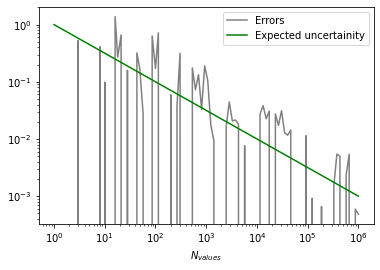

In [59]:
error = (results - truevalue(sigma))/truevalue(sigma)
    
plt.plot(N_values, error, color = 'grey', label='Errors')
plt.axhline(0, color='red')
plt.plot(N_values, N_values**(-0.5), c='green', label='Expected uncertainity')
plt.loglog()
plt.xlabel("$N_{values}$")
plt.legend()
plt.show()

Do it many times. For a given $N$, how are the result distributed? 

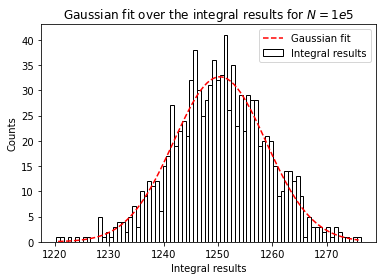

For a large N, the distribution seems to take a gaussian form


In [24]:
mu = 0
sigma = 5
N = 100000
reps = 1000

integrals = []

def fun(x):
    return x**3 

for _ in range(reps):
    xi = halfnorm.rvs(loc=0, scale=sigma, size=N)
    integral = np.sqrt(np.pi / 2) * sigma * np.mean(fun(xi))  #normalized half-gaussian
    
    integrals.append(integral)
    
# computation of the histogram values
counts, bin_edges = np.histogram(integrals, bins=80)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Gaussian fit
p0 = [np.mean(bin_centers), np.std(bin_centers), np.max(counts)] 
params, cov = curve_fit(gaussian, bin_centers, counts, p0=p0)

# histogram plot
plt.bar(bin_centers, counts, width=np.diff(bin_edges), 
        edgecolor = 'black', color= 'white', label='Integral results')

# fit plot
x_range = np.linspace(min(bin_centers), max(bin_centers), 100)
plt.plot(x_range, gaussian(x_range, *params), color='r', linestyle='dashed', label='Gaussian fit')

plt.title('Gaussian fit over the integral results for $N = 1e5$')
plt.legend()
plt.xlabel('Integral results')
plt.ylabel('Counts')

plt.show()

print("For a large N, the distribution seems to take a gaussian form")

And if $N$ is small?

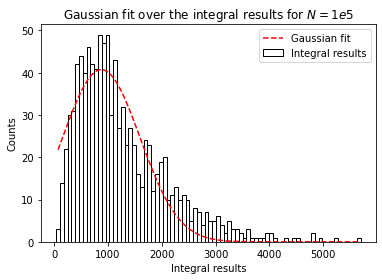

For a small N, the distribution seems to take a poissonian form


In [25]:
mu = 0
sigma = 5
N = 10
reps = 1000

integrals = []

def fun(x):
    return x**3 

for _ in range(reps):
    xi = halfnorm.rvs(loc=0, scale=sigma, size=N)
    integral = np.sqrt(np.pi / 2) * sigma * np.mean(fun(xi))  #normalized half-gaussian
    
    integrals.append(integral)
    
# computation of the histogram values
counts, bin_edges = np.histogram(integrals, bins=80)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Gaussian fit
p0 = [np.mean(bin_centers), np.std(bin_centers), np.max(counts)] 
params, cov = curve_fit(gaussian, bin_centers, counts, p0=p0)

# histogram plot
plt.bar(bin_centers, counts, width=np.diff(bin_edges), 
        edgecolor = 'black', color= 'white', label='Integral results')

# fit plot
x_range = np.linspace(min(bin_centers), max(bin_centers), 100)
plt.plot(x_range, gaussian(x_range, *params), color='r', linestyle='dashed', label='Gaussian fit')

plt.title('Gaussian fit over the integral results for $N = 1e5$')
plt.legend()
plt.xlabel('Integral results')
plt.ylabel('Counts')

plt.show()

print("For a small N, the distribution seems to take a poissonian form")